##### S.H.Reeder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import k,R

All of the aguments below were taken from chapters 2 and 3 of `Atom, Molecule, and Cluster Beams I`, H. Pauly (2000)
<br>
https://link.springer.com/book/10.1007/978-3-662-04213-7
<br><br>
But excellent summaries of the physics and alternative notations can be found in the Theses of R. Gardner (2016)
<br> https://raizenlab.ph.utexas.edu/pub/Gardnerthesis.pdf (Chapter 2)
<br>
and S. Hogan (2012)<br>
https://www.ucl.ac.uk/amopp/sites/amopp/files/HOGAN_Habilitation_ETHZ_2012.pdf (Chapter 4)

This script will not delve into detail on the physics, I refer to the above for full explanations of the functions herein.  A compilation of the functions used in this script can be found at the bottom for ease of use.

---

For the purpose of practical examples for the functions below, I will use experimental parameters for a beam of metastable monoatomic helium created with a pulsed valve at room temperature, with a stagnation pressure of 3bar and pressure after the valve of $1\times10^{-4}$mbar.

In [2]:
m_He = 6.6464731e-27 #Helium mass (kg)
T1 = 300 # Valve temperature (K)
P1 = 3e5 # Stagnation (reservoir) pressure (Pa) - 3bar
P2 = 1e-2 # Chamber pressure (Pa)

# Effusive beams

The equation of state for an `Ideal gas` can be written in the form:
<br><br>
$P = nk_BT$ (1)
<br><br>
Where $n$ is the number of molecules, $k_B$ is the Boltzman constant and $T$ is the temperature.
The most probable kinetic energy for the atoms is $k_BT$, and thus we can write the most probable speed for the effusive beam as:
<br><br>
$v_W = \sqrt{\frac{2k_BT}{m}}$    (2)

In [3]:
def v_w(T1,m):
    '''Calculate most probable velocity from inital temperature and mass'''
    from scipy.constants import k
    vw = np.sqrt((2*k*T1)/m)
    return vw
vw = v_w(T1,m_He)
print('Most probable effusive beam speed = ','%.2f'%vw,' m/s')

Most probable effusive beam speed =  1116.40  m/s


And we can write the speed distribution as an isotropic Maxwellian in the form:
<br><br>
$f_{eff}(v)=\frac{4}{\sqrt{\pi}}\bigg(\frac{m}{2k_BT}\bigg)^{3/2}v^2
exp\bigg(-\frac{mv^2}{2k_BT}\bigg)$,  (3)
<br><br>
Where $v$ is the speed.

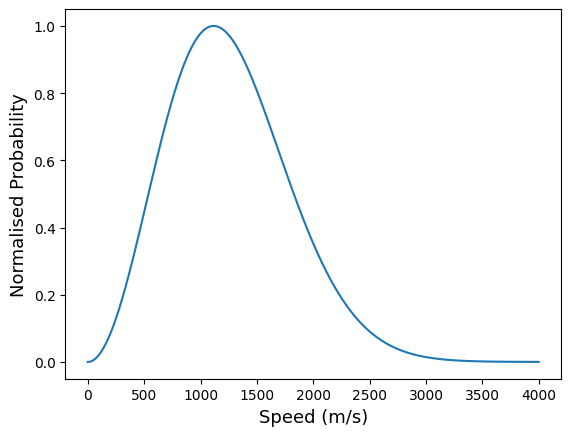

In [4]:
def f_eff(m,v,T):
    '''Effusive beam speed probability distribution'''
    from scipy.constants import k
    a = 4/np.sqrt(np.pi)
    b = (m/2*k*T)**(3/2)
    c = (m*v**2)/(2*k*T)
    f = a*b * v**2 * np.exp(-c)
    return f

vs = np.arange(0,4001,1) # Choose arbitrary range of speeds to feed the function
f_v = f_eff(m_He,vs,T1)
plt.plot(vs,f_v/max(f_v))
plt.xlabel('Speed (m/s)',fontsize=13)
plt.ylabel('Normalised Probability',fontsize=13)
plt.show()

# Supersonic beams

If we make the assumptions that the gas passes from a region of high pressure $P_1$ into a region of low pressure $P_2<<P_1$ through an aperture that is long compared to the mean free path of the atoms and that the expansion is `adiabtic` (i.e. $dQ/dt=0$), we can write a relation between the pressures and temperatures before and after the valve aperture of the form:
<br><br>
$\frac{P_2}{P_1}=\bigg(\frac{T_2}{T_1}\bigg)^{\gamma/(\gamma-1)}$, (4)
<br><br>
where $\gamma = \frac{c_P}{c_V}$ (5) is the ratio of the constant volume and pressure specific heats:
<br><br>
$c_V = \bigg(\frac{dQ}{dT}\bigg)_V = \frac{f}{2}nR$ (6) and $c_P = \bigg(\frac{dQ}{dT}\bigg)_P = \frac{f+1}{2}nR$ (7),
<br><br>
where $f$ is the number of active `degrees of freedom`. For a monoatomic gas $f=3$. Eq.(4) esentially shows that passing from a high pressure region into a low pressure region leads to significant cooling of the gas. Rearranging (4) for $T_2$ we have:
<br><br>
$T_2 = \bigg(\frac{P_2}{P_1}\bigg)^{(\gamma-1)/\gamma}T_1$ (8)

In [5]:
gamma = 5/3 # from equations (5-7)

def T_2(P1,P2,T1,gamma):
    '''Calculate gas temperature after the nozzle'''
    T2 = np.power((P2/P1),((gamma-1)/gamma))*T1
    return T2
print('Estimated temperature after the nozzle: ','%.2f'%T_2(P1,P2,T1,gamma),'K')

Estimated temperature after the nozzle:  0.31 K


A useful comparision to show is that in the limiting case of $T_2=P_2=0$ the maxium longitudinal speed of the atoms is very nearly the mean speed of the reservoir gas
<br><br>
$v_{max}=v_W\sqrt{\frac{\gamma}{\gamma-1}}$ (9).

In [6]:
def vmax_est(T1,m,gamma):
    '''Estimate maxium longitudinal speed if T2=P2=0'''
    from scipy.constants import k
    vw = np.sqrt(2*k*T1/m)
    vmax = vw*np.sqrt(gamma/(gamma-1))
    return vmax
vmax = vmax_est(T1,m_He,gamma)
print('Maximuim possible speed =','%.2f'%vmax,'m/s')

Maximuim possible speed = 1765.19 m/s


In the more realistic case of a finite final temperature and pressure we can model the 3d velocity probability distribution as an anisotropic Maxwellian in $\vec{v}\equiv\vec{v}_{\perp}+\vec{v}_{||}$
<br><br>
$f(v_{\perp},v_{||}) = \frac{m}{2\pi k_BT_{\perp}}\bigg(\frac{m}{2\pi k_BT_{||}}\bigg)^{1/2}
exp\bigg(-\frac{mv_{\perp}^2}{2k_BT_{\perp}}-\frac{m(v_{||}-v_2)^2}{2k_BT_{||}}\bigg)$ (10)
<br><br>
where $v_2$ is the final speed of the ensemble (not a single atom) or the average velocity in the longitudinal direction
<br><br>
$v_2 = \sqrt{2\frac{\gamma}{\gamma-1}\frac{RT_1}{M}\bigg(1-(P_2/P_1)^{(\gamma-1)/\gamma}}\bigg)
     =v_W\sqrt{\frac{\gamma}{\gamma-1}\bigg(1-(P_2/P_1)^{(\gamma-1)/\gamma}}\bigg)$ (11)

In [7]:
def v_2(P1,P2,gamma,vw):
    '''average longitudinal velocity'''
    a = gamma/(gamma-1)
    b = P2/P1
    c = (gamma-1)/gamma
    v2 = vw*np.sqrt(a*(1-b**c))
    return v2
v2 = v_2(P1,P2,gamma,vw)
print('Average longitudinal speed =','%.2f'%v2,'m/s')

Average longitudinal speed = 1764.29 m/s


Since the perpendicular (transverse) temperature of the beam mostly manifests as a reduction in flux, we therefore model the final velocity distribution as the distribution in the z direction:
<br><br>
$f(v_{\parallel})\propto exp\bigg(-\frac{m(v_{\parallel}-v_2)^2}{2k_BT}\bigg)$ (12)
<br><br>
Or more specifically...
<br><br>
$f(v_{||}) = C\bigg(\frac{v}{v_W}\bigg)^\nu exp\bigg(\bigg(-\frac{v_{||}-v_2}{v_W}\bigg)^2\bigg)$ (13)
<br><br>
where $C$ is a normalisation constant and the exponent $\nu$ depends on the detector used to measure beam intensity; $\nu=2$ holds for a density detector, $\nu=3$ for a flux detector. An MCP (which we use) measures the number of atoms hitting the plates in a given time and thus hereafter $\nu=3$.

In [8]:
def f(C,m,v,v2,T):
    '''Probability distribution of longitudinal velocities for supersonic beam'''
    from scipy.constants import k
    vw = np.sqrt(2*k*T/m) # define vw again for ease
    a = (v/vw)**3
    b = (m*(v-v2)**2)/(2*k*T)
    f = C * a * np.exp(-b)
    return f

As a useful comparison we can now plot the velocity distributions for an effusive and a supersonic beam.

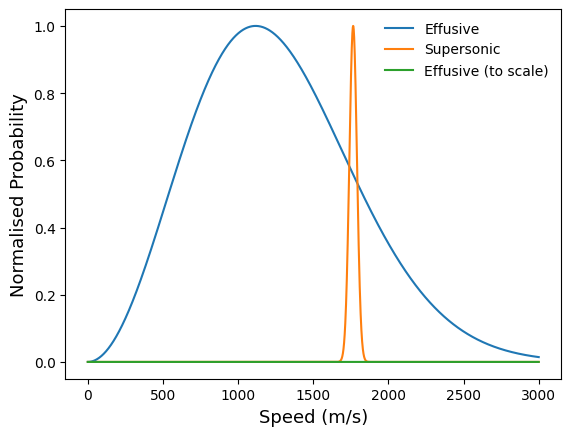

In [9]:
## Experimental parameters (mine)
vw = v_w(T1,m_He)
T2 = T_2(P1,P2,T1,gamma)
v2 = v_2(P1,P2,gamma,vw)

vs = np.arange(0,3001,1) # range of speeds to feed into the equations
f_effs = f_eff(m_He,vs,T1) # effusive beam
fs = f(1,m_He,vs,v2,T2) # supersonic beam

## Plot stuff
plt.plot(vs,f_effs/max(f_effs),label='Effusive')
plt.plot(vs,fs/max(fs),label='Supersonic')
plt.plot(vs,f_effs,label='Effusive (to scale)')
plt.legend(loc='best',frameon=False)
plt.xlabel('Speed (m/s)',fontsize=13)
plt.ylabel('Normalised Probability',fontsize=13)
plt.show()

Not only is the velocity distribution for supersonic beams far narrower, but it is many orders of magnitude brighter.

### `Mach number`

A useful parameter to define is the the Mach number $M=v/c$, which is the ratio of the speed of the beam $v$ to the local speed of sound in the beam $c$:
<br><br>
$c=\sqrt{\gamma\frac{P}{\rho}}$ (14)
<br><br>
where $\rho$ is the beam density. The Mach number can then be defined as:
<br><br>
$M_F = \sqrt{\frac{2}{\gamma-1}\bigg(\bigg(\frac{P_1}{P_2}\bigg)^{(\gamma-1)/\gamma}-1\bigg)}$ (15)
<br><br>
and can be used to calculate almost all properties of the beam.

In [10]:
def M_F(P1,P2,gamma):
    '''Calculate final mach number'''
    a = (2/(gamma-1))
    b = np.power((P1/P2),((gamma-1)/gamma))
    M_F = np.sqrt(a*(b-1))
    return M_F
MF = M_F(P1,P2,gamma)
print('Estimated mach number after the nozzle: ','%.2f'%MF)

Estimated mach number after the nozzle:  54.17


For instance,
<br><br>
$v_2 = M_F\sqrt{\gamma\frac{k_BT_1}{m}\bigg/\bigg(1+\frac{\gamma-1}{2}M_F^2\bigg)}$ (16)

In [11]:
def v_2_mach(T1,m,gamma,MF):
    '''Average velocity in the longitudinal direction as a function of Mach number'''
    from scipy.constants import k
    a = (k*T1)/m
    b = (gamma-1)/2
    v2 = MF * np.sqrt((gamma*a)/(1+b*MF**2))
    return v2
v2_mach = v_2_mach(T1,m_He,gamma,MF)
print('Average longitudinal speed =','%.2f'%v2_mach,'m/s')

Average longitudinal speed = 1764.29 m/s


### `z dependence`

It is also useful to define the parameters above as a function of the nozzle aperture $D$ and the distance away from the nozzle $z$. See Hogan (2012) thesis.

$M(z) = A\bigg(\frac{z}{D}-B\bigg)^{\gamma-1}-C\bigg(\frac{z}{D}-B\bigg)^{1-\gamma}$ (17)
<br><br>
$T(z) = \frac{T_1}{1+\frac{1}{2}(\gamma-1)M(z)^2}$ (18)
<br><br>
$v(z) = M(z)\sqrt{\frac{\gamma k_BT(z)}{m}}$ (19)

In [12]:
def M_z(A,B,C,D,z,gamma):
    '''Mach number at distance z from valve with diammeter D'''
    Mz = A*((z/D)-B)**(gamma-1) - C*((z/D)-B)**(1-gamma)
    return Mz

def T_z(T0,gamma,Mz):
    '''Beam temperature at distance z from the valve'''
    a = 1 + 0.5*(gamma-1)*Mz**2
    Tz = T0/a
    return Tz
 
def v_z(Mz,gamma,m,Tz):
    '''Mean longitudinal velocity'''
    from scipy.constants import k
    vz = Mz*np.sqrt((gamma*k*Tz)/m)
    return vz

def f_hog(m,v,vz,Tz):
    '''Beam velocity distribution from Hogan (2012)'''
    from scipy.constants import k
    a = m*(v-vz)**2
    b = 2*k*Tz
    f = v**2 * np.exp(-a/b)
    return f

To convince you of these, we replicate Fig.4.1 from the Hogan (2012) thesis.

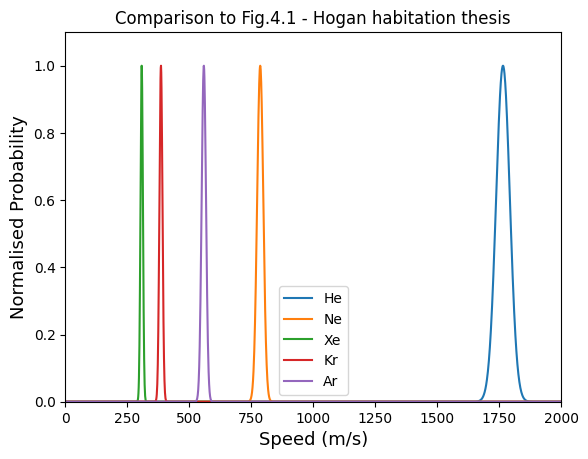

In [13]:
## Monoatomic gas masses
m_He = 6.6464731e-27 #kg
m_Xe = 2.1801714e-25
m_Ne = 3.3509177e-26
m_Kr = 1.3914984e-25
m_Ar = 6.6335209e-26

# For a monoatomic gas
A = 3.26
B = 0.075
C = 0.61
gamma = 5/3

# with valve diameter and distance
D = 0.51e-3 # m
z = 30e-3 # m

# at room temperature
T0 = 300 # K

# Use functions in cell above
Mz = M_z(A,B,C,D,z,gamma)
Tz = T_z(T0,gamma,Mz)

vz_He = v_z(Mz,gamma,m_He,Tz)
vdist_He = f_hog(m_He,vs,vz_He,Tz)
vz_Ne = v_z(Mz,gamma,m_Ne,Tz)
vdist_Ne = f_hog(m_Ne,vs,vz_Ne,Tz)
vz_Xe = v_z(Mz,gamma,m_Xe,Tz)
vdist_Xe = f_hog(m_Xe,vs,vz_Xe,Tz)
vz_Kr = v_z(Mz,gamma,m_Kr,Tz)
vdist_Kr = f_hog(m_Kr,vs,vz_Kr,Tz)
vz_Ar = v_z(Mz,gamma,m_Ar,Tz)
vdist_Ar = f_hog(m_Ar,vs,vz_Ar,Tz)

# Plot lines
plt.plot(vs,vdist_He/max(vdist_He),label='He')
plt.plot(vs,vdist_Ne/max(vdist_Ne),label='Ne')
plt.plot(vs,vdist_Xe/max(vdist_Xe),label='Xe')
plt.plot(vs,vdist_Kr/max(vdist_Kr),label='Kr')
plt.plot(vs,vdist_Ar/max(vdist_Ar),label='Ar')

plt.xlim(0,2000)
plt.ylim(0,1.1)
plt.legend(loc='best')
plt.xlabel('Speed (m/s)',fontsize=13)
plt.ylabel('Normalised Probability',fontsize=13)
plt.title('Comparison to Fig.4.1 - Hogan habitation thesis')
plt.show()

It is worth noting here that helium is a special case, as due to its small mass, the De Broglie wavelength becomes very large at low temperatures and quantum effects overcome classical thermodynamics. Furthermore, the helium dimer binding energy is $1.1\times10^{-7}$eV, and thus very high stagnation pressures can be used at very low temperatures without causing condensation.

---

# Functions 

In [14]:
#---------------------------------------- Effusive Beams --------------------------------------------------------
def v_w(T1,m):
    '''Calculate most probable velocity from inital temperature and mass.
    Inputs:
    -------
    T1 = Initial temperature (K).
    m  = atomic mass (kg).
    
    Returns:
    -------
    Most probable velocity (m/s).
    '''
    from scipy.constants import k
    vw = np.sqrt((2*k*T1)/m)
    return vw

def f_eff(m,v,T):
    '''Effusive beam speed probability distribution.
    Inputs:
    -------
    m          = atomic mass (kg).
    v (array)  = speeds (m/s).
    T1         = Initial temperature (K).
    
    Returns:
    -------
    Speed probability distribution (array).
    '''
    from scipy.constants import k
    a = 4/np.sqrt(np.pi)
    b = (m/2*k*T)**(3/2)
    c = (m*v**2)/(2*k*T)
    f = a*b * v**2 * np.exp(-c)
    return f

#---------------------------------------- Supersonic Beams --------------------------------------------------
def T_2(P1,P2,T1,gamma):
    '''Calculate gas temperature after the nozzle.
    Inputs:
    -------
    P1    = reservoir pressure (Pa).
    P2    = pressure after nozzle (Pa).
    T1    = Initial temperature (K).
    gamma = Contstant volume/pressure specific heat ratio.
    
    Returns:
    -------
    Temperature of the supersonic expansion after the nozzle.
    '''
    T2 = np.power((P2/P1),((gamma-1)/gamma))*T1
    return T2

def vmax_est(T1,m,gamma):
    '''Estimate maxium longitudinal speed if T2=P2=0.
    Inputs:
    -------
    T1    = Initial temperature (K).
    m     = atomic mass (kg).
    gamma = Contstant volume/pressure specific heat ratio.
        
    Returns:
    -------
    Maximum possible longitudinal speed (m/s).
    '''
    from scipy.constants import k
    vw = np.sqrt(2*k*T1/m)
    vmax = vw*np.sqrt(gamma/(gamma-1))
    return vmax

def v_2(P1,P2,gamma,vw):
    '''Average longitudinal velocity.
    Inputs:
    -------
    P1    = reservoir pressure (Pa).
    P2    = pressure after nozzle (Pa).
    gamma = Contstant volume/pressure specific heat ratio.
    vw    = Most probable velocity (m/s).
    
    Returns:
    Mean lognitudinal vlocity of the beam (m/s)
    -------
    
    '''
    a = gamma/(gamma-1)
    b = P2/P1
    c = (gamma-1)/gamma
    v2 = vw*np.sqrt(a*(1-b**c))
    return v2

def f(m,v,v2,T,C=1):
    '''Probability distribution of longitudinal velocities for supersonic beam.
    Inputs:
    -------
    m         = atomic mass (kg).
    v (array) = speeds (m/s).
    v2        = Mean lognitudinal vlocity of the beam (m/s)
    T         = Initial temperature (K).
    C         = Normalisation constant (default=1).
    
    Returns:
    -------
    Velocity probability distribution (array).
    '''
    from scipy.constants import k
    vw = np.sqrt(2*k*T/m) # define vw again for ease
    a = (v/vw)**3
    b = (m*(v-v2)**2)/(2*k*T)
    f = C * a * np.exp(-b)
    return f

def M_F(P1,P2,gamma):
    '''Calculate mach number after the nozzle.
    Inputs:
    -------
    P1    = reservoir pressure (Pa).
    P2    = pressure after nozzle (Pa).
    gamma = Contstant volume/pressure specific heat ratio.
    
    Returns:
    -------
    Mach number.
    '''
    a = (2/(gamma-1))
    b = np.power((P1/P2),((gamma-1)/gamma))
    M_F = np.sqrt(a*(b-1))
    return M_F

def v_2_mach(T1,m,gamma,MF):
    '''Average velocity in the longitudinal direction as a function of Mach number.
    Inputs:
    -------
    T1    = Initial temperature (K).
    m     = atomic mass (kg).
    gamma = Contstant volume/pressure specific heat ratio.
    M_F   = Mach number.
    
    Returns:
    -------
    Mean lognitudinal vlocity of the beam (m/s)
    '''
    from scipy.constants import k
    a = (k*T1)/m
    b = (gamma-1)/2
    v2 = MF * np.sqrt((gamma*a)/(1+b*MF**2))
    return v2

#---------------------------------------- z dependent functions --------------------------------------------------

def M_z(A,B,C,D,z,gamma):
    '''Mach number at distance z from valve with diammeter D.
    Inputs:
    -------
    A,B,C = Constants taken from Hogan Thesis (2014).
    D     = Dimmeter of exit aperture (m).
    z     = distance from aperture (m).
    gamma = Contstant volume/pressure specific heat ratio.
    
    Returns:
    -------
    Mz = z dependent Mach number.
    '''
    Mz = A*((z/D)-B)**(gamma-1) - C*((z/D)-B)**(1-gamma)
    return Mz

def T_z(T0,gamma,Mz):
    '''Beam temperature at distance z from the valve.
    Inputs:
    -------
    T0    = Initial temperature (K).
    gamma = Contstant volume/pressure specific heat ratio.
    Mz    = z dependent Mach number.
    
    Returns:
    -------
    Tz = z dependent beam temperature (K).
    '''
    a = 1 + 0.5*(gamma-1)*Mz**2
    Tz = T0/a
    return Tz
 
def v_z(Mz,gamma,m,Tz):
    '''Mean longitudinal velocity.
    Inputs:
    -------
    gamma = Contstant volume/pressure specific heat ratio.
    Mz    = z dependent Mach number.
    Tz    = z dependent beam temperature (K).
    m     = atomic mass (kg).
 
    Returns:
    -------
    vz = z dependent longitudinal velocity (m/s).
    '''
    from scipy.constants import k
    vz = Mz*np.sqrt((gamma*k*Tz)/m)
    return vz

def f_hog(m,v,vz,Tz):
    '''Beam velocity distribution from Hogan (2012).
    Inputs:
    -------
    Tz    = z dependent beam temperature (K).
    m     = atomic mass (kg).
    vz    = z dependent longitudinal velocity (m/s).
    v     = 1D array of velocities (m/s). 
    
    Returns:
    -------
    f = probability distribution of velocities.
    '''
    from scipy.constants import k
    a = m*(v-vz)**2
    b = 2*k*Tz
    f = v**2 * np.exp(-a/b)
    return f

#------------------------------------ Composite supersonic mega function -----------------------------------------------
def f_mSS(m,v,P1,P2,T1,gamma):
    '''Probability distribution of longitudinal velocities for supersonic beam.
    Inputs:
    -------
    m     = atomic mass (kg).
    v     = 1D array of velocities (m/s). 
    P1    = reservoir pressure (Pa).
    P2    = pressure after nozzle (Pa).
    T1    = Initial temperature (K).
    gamma = Contstant volume/pressure specific heat ratio.
    
    Returns:
    -------
    f = probability distribution of velocities.
    '''
    from scipy.constants import k
    T2 = np.power((P2/P1),((gamma-1)/gamma))*T1 # temp after nozzle
    vw = np.sqrt(2*k*T1/m) # KE = 2kT
    v2 = vw*np.sqrt((gamma/(gamma-1))*(1-(P2/P1)**((gamma-1)/gamma))) # Av. velocity after nozzle
    
    a = (v/vw)**3
    b = (m*(v-v2)**2)/(2*k*T2)
    f = a * np.exp(-b)
    return f

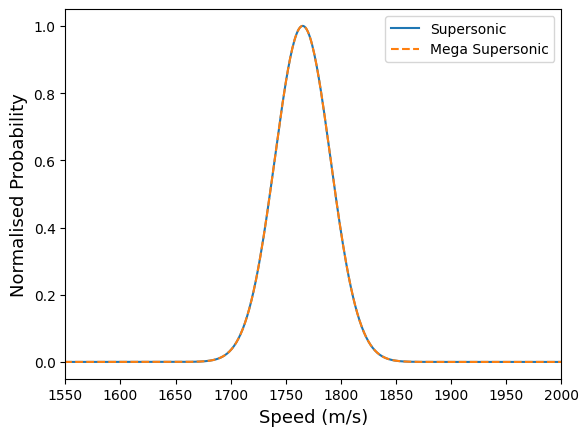

In [15]:
# Compare functions above
fs = f(m_He,vs,v2,T2) # supersonic beam
fm = f_mSS(m_He,vs,P1,P2,T1,gamma) # supersonic beam

plt.plot(vs,fs/max(fs),label='Supersonic')
plt.plot(vs,fm/max(fm),ls='--',label='Mega Supersonic')
plt.xlim(1550,2000)
plt.xlabel('Speed (m/s)',fontsize=13)
plt.ylabel('Normalised Probability',fontsize=13)
plt.legend()
plt.show()